In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from collections import defaultdict

In [2]:
path = r'smiles/'

Fp  = pd.read_csv(path + 'mordard_Kp.csv'               , header = 0)

In [3]:
Fp.shape

(144, 1494)

In [4]:
Fp

,name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,26.858127,18.440048,0,1,45.563879,2.474360,4.797195,45.563879,1.340114,...,10.355741,84.513885,458.248190,7.049972,4090,51,180.0,210.0,8.611111,7.500000
1,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,31.623856,25.325660,1,0,51.534392,2.580642,4.976469,51.534392,1.256936,...,10.568467,92.695967,558.253000,7.345434,5382,65,210.0,245.0,14.305556,9.083333
2,Cn1c(=O)c2c(ncn2C)n(C)c1=O,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,...,9.824498,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778
3,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,26.058210,20.036929,3,0,43.820538,2.509923,4.913255,43.820538,1.327895,...,10.477429,85.243868,440.159689,8.304900,3326,54,178.0,214.0,8.972222,7.305556
4,COCc1c(C(C)C)nc(C(C)C)c(/C=C/[C@@H](O)C[C@@H](...,24.743058,21.073154,1,0,39.567461,2.503693,5.007386,39.567461,1.199014,...,10.312247,68.788367,459.242101,6.854360,3124,52,162.0,186.0,14.083333,7.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,23.268833,18.862705,0,0,36.874803,2.481037,4.962075,36.874803,1.229160,...,10.398641,65.900498,418.271924,6.151058,2440,50,158.0,185.0,11.923611,6.486111
140,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,24.165701,19.978681,0,1,41.742357,2.453835,4.907669,41.742357,1.264920,...,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,12.951389,7.888889
141,Oc1ccc2c(c1)OCO2,7.847124,7.263853,0,0,13.052008,2.351358,4.597208,13.052008,1.305201,...,9.097508,53.600166,138.031694,8.626981,108,11,52.0,60.0,2.833333,2.194444
142,C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2,21.637229,16.896431,0,0,35.811901,2.531765,4.876350,35.811901,1.377381,...,10.393079,79.672949,354.110338,8.047962,1694,42,154.0,191.0,5.111111,5.444444


In [5]:
df = pd.read_csv('df6_lipinski_Kpu_Kp_cells.csv')
df

,compound,smiles,kp,logkp,kpu,Cells,LogKpu,MW,TPSA,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,NumRadicalElectrons,NumValenceElectrons
0,Astemizole,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,268.00,2.4,0.380,HEK293,-0.420216,458.581,42.32,5.35130,1.0,5.0,8.0,0.941176,1.647059,2.382353,0.0,176.0
1,Atorvastatin,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,2.50,0.4,0.057,HEK293,-1.244125,558.650,111.79,6.31360,4.0,5.0,12.0,0.853659,1.463415,2.048780,0.0,214.0
2,Caffeine,Cn1c(=O)c2c(ncn2C)n(C)c1=O,0.74,-0.1,0.540,HEK293,-0.267606,194.194,61.82,-1.02930,0.0,6.0,0.0,1.142857,1.785714,2.428571,0.0,74.0
3,Candesartan,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,1.60,0.2,0.120,HEK293,-0.920819,440.463,118.81,4.02860,2.0,7.0,7.0,1.030303,1.818182,2.515152,0.0,164.0
4,Cerivastatin,COCc1c(C(C)C)nc(C(C)C)c(/C=C/[C@@H](O)C[C@@H](...,35.00,1.5,0.750,HEK293,-0.124939,459.558,99.88,4.88070,3.0,5.0,11.0,1.090909,1.696970,2.212121,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Simvastatin acid,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,42.00,1.6,0.700,HEK293,-0.154902,418.574,72.83,4.58560,1.0,5.0,6.0,1.266667,2.000000,2.666667,0.0,168.0
140,Verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,151.00,2.2,5.100,HEK293,0.707570,454.611,63.95,5.09308,0.0,6.0,13.0,0.848485,1.424242,1.969697,0.0,180.0
141,sesamol,Oc1ccc2c(c1)OCO2,0.01,-1.9,0.010,SK-MEL-2,-2.000000,138.122,38.69,1.12090,1.0,3.0,0.0,1.200000,2.000000,2.900000,0.0,52.0
142,sesamin,C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2,0.50,-0.3,0.500,SK-MEL-2,-0.301030,354.358,55.38,3.21920,0.0,6.0,2.0,0.576923,1.038462,1.538462,0.0,134.0


In [6]:
df_logkp = df[['compound', 'smiles', 'kp', 'logkp']]
df_logkp.to_csv('logkp_144_compounds.csv')
df_logkp

,compound,smiles,kp,logkp
0,Astemizole,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,268.00,2.4
1,Atorvastatin,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,2.50,0.4
2,Caffeine,Cn1c(=O)c2c(ncn2C)n(C)c1=O,0.74,-0.1
3,Candesartan,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,1.60,0.2
4,Cerivastatin,COCc1c(C(C)C)nc(C(C)C)c(/C=C/[C@@H](O)C[C@@H](...,35.00,1.5
...,...,...,...,...
139,Simvastatin acid,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,42.00,1.6
140,Verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,151.00,2.2
141,sesamol,Oc1ccc2c(c1)OCO2,0.01,-1.9
142,sesamin,C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2,0.50,-0.3


In [7]:
name = df['compound']

In [8]:
name.shape

(144,)

In [9]:
df2 = df.rename({'compound': 'Name'}, axis=1)
df3 = df2.set_index('Name')
df3

,smiles,kp,logkp,kpu,Cells,LogKpu,MW,TPSA,LogP,NumHDonors,NumHAcceptors,NumRotatableBonds,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,NumRadicalElectrons,NumValenceElectrons
Name,,,,,,,,,,,,,,,,,
Astemizole,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,268.00,2.4,0.380,HEK293,-0.420216,458.581,42.32,5.35130,1.0,5.0,8.0,0.941176,1.647059,2.382353,0.0,176.0
Atorvastatin,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,2.50,0.4,0.057,HEK293,-1.244125,558.650,111.79,6.31360,4.0,5.0,12.0,0.853659,1.463415,2.048780,0.0,214.0
Caffeine,Cn1c(=O)c2c(ncn2C)n(C)c1=O,0.74,-0.1,0.540,HEK293,-0.267606,194.194,61.82,-1.02930,0.0,6.0,0.0,1.142857,1.785714,2.428571,0.0,74.0
Candesartan,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,1.60,0.2,0.120,HEK293,-0.920819,440.463,118.81,4.02860,2.0,7.0,7.0,1.030303,1.818182,2.515152,0.0,164.0
Cerivastatin,COCc1c(C(C)C)nc(C(C)C)c(/C=C/[C@@H](O)C[C@@H](...,35.00,1.5,0.750,HEK293,-0.124939,459.558,99.88,4.88070,3.0,5.0,11.0,1.090909,1.696970,2.212121,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simvastatin acid,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,42.00,1.6,0.700,HEK293,-0.154902,418.574,72.83,4.58560,1.0,5.0,6.0,1.266667,2.000000,2.666667,0.0,168.0
Verapamil,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,151.00,2.2,5.100,HEK293,0.707570,454.611,63.95,5.09308,0.0,6.0,13.0,0.848485,1.424242,1.969697,0.0,180.0
sesamol,Oc1ccc2c(c1)OCO2,0.01,-1.9,0.010,SK-MEL-2,-2.000000,138.122,38.69,1.12090,1.0,3.0,0.0,1.200000,2.000000,2.900000,0.0,52.0


In [10]:
LogKp = df3[['logkp']]
LogKp

,logkp
Name,
Astemizole,2.4
Atorvastatin,0.4
Caffeine,-0.1
Candesartan,0.2
Cerivastatin,1.5
...,...
Simvastatin acid,1.6
Verapamil,2.2
sesamol,-1.9


In [15]:
Fp = Fp.rename(columns={'name': 'Name'})
Fp

,Name,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Astemizole,26.858127,18.440048,0,1,45.563879,2.474360,4.797195,45.563879,1.340114,...,10.355741,84.513885,458.248190,7.049972,4090,51,180.0,210.0,8.611111,7.500000
1,Atorvastatin,31.623856,25.325660,1,0,51.534392,2.580642,4.976469,51.534392,1.256936,...,10.568467,92.695967,558.253000,7.345434,5382,65,210.0,245.0,14.305556,9.083333
2,Caffeine,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,...,9.824498,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778
3,Candesartan,26.058210,20.036929,3,0,43.820538,2.509923,4.913255,43.820538,1.327895,...,10.477429,85.243868,440.159689,8.304900,3326,54,178.0,214.0,8.972222,7.305556
4,Cerivastatin,24.743058,21.073154,1,0,39.567461,2.503693,5.007386,39.567461,1.199014,...,10.312247,68.788367,459.242101,6.854360,3124,52,162.0,186.0,14.083333,7.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Simvastatin acid,23.268833,18.862705,0,0,36.874803,2.481037,4.962075,36.874803,1.229160,...,10.398641,65.900498,418.271924,6.151058,2440,50,158.0,185.0,11.923611,6.486111
140,Verapamil,24.165701,19.978681,0,1,41.742357,2.453835,4.907669,41.742357,1.264920,...,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,12.951389,7.888889
141,sesamol,7.847124,7.263853,0,0,13.052008,2.351358,4.597208,13.052008,1.305201,...,9.097508,53.600166,138.031694,8.626981,108,11,52.0,60.0,2.833333,2.194444
142,sesamin,21.637229,16.896431,0,0,35.811901,2.531765,4.876350,35.811901,1.377381,...,10.393079,79.672949,354.110338,8.047962,1694,42,154.0,191.0,5.111111,5.444444


In [13]:
Fp.Name = name

In [14]:
Fpp = Fp.drop('Name', axis=1)
Fpp

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,26.858127,18.440048,0,1,45.563879,2.474360,4.797195,45.563879,1.340114,4.464529,...,10.355741,84.513885,458.248190,7.049972,4090,51,180.0,210.0,8.611111,7.500000
1,31.623856,25.325660,1,0,51.534392,2.580642,4.976469,51.534392,1.256936,4.627169,...,10.568467,92.695967,558.253000,7.345434,5382,65,210.0,245.0,14.305556,9.083333
2,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,3.586590,...,9.824498,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778
3,26.058210,20.036929,3,0,43.820538,2.509923,4.913255,43.820538,1.327895,4.442051,...,10.477429,85.243868,440.159689,8.304900,3326,54,178.0,214.0,8.972222,7.305556
4,24.743058,21.073154,1,0,39.567461,2.503693,5.007386,39.567461,1.199014,4.387149,...,10.312247,68.788367,459.242101,6.854360,3124,52,162.0,186.0,14.083333,7.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,23.268833,18.862705,0,0,36.874803,2.481037,4.962075,36.874803,1.229160,4.321583,...,10.398641,65.900498,418.271924,6.151058,2440,50,158.0,185.0,11.923611,6.486111
140,24.165701,19.978681,0,1,41.742357,2.453835,4.907669,41.742357,1.264920,4.385221,...,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,12.951389,7.888889
141,7.847124,7.263853,0,0,13.052008,2.351358,4.597208,13.052008,1.305201,3.260915,...,9.097508,53.600166,138.031694,8.626981,108,11,52.0,60.0,2.833333,2.194444
142,21.637229,16.896431,0,0,35.811901,2.531765,4.876350,35.811901,1.377381,4.254968,...,10.393079,79.672949,354.110338,8.047962,1694,42,154.0,191.0,5.111111,5.444444


In [16]:
Fpp = Fpp.fillna(0)

In [17]:
from sklearn import preprocessing

def normalized (Fp):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp)
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp.columns)
    Fp_normalized
    
    return Fp_normalized

In [18]:
Fp_n = normalized (Fpp)

In [19]:
Fp_n

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.623730,0.481795,0.000000,1.0,0.724525,0.945336,0.930012,0.724525,0.972944,0.927788,...,0.654953,0.647866,0.549935,0.179744,1.723809e-07,0.533333,0.627451,0.609756,0.501618,0.593168
1,0.780088,0.778628,0.333333,0.0,0.819464,0.985942,0.964767,0.819464,0.912555,0.961586,...,0.765684,0.804623,0.721681,0.234067,2.283117e-07,0.720000,0.774510,0.752033,0.833333,0.770186
2,0.099193,0.138245,0.000000,0.0,0.280948,0.957033,0.956299,0.280948,0.916244,0.745340,...,0.378423,0.188209,0.096257,0.370352,6.493506e-09,0.186667,0.117647,0.138211,0.365696,0.093168
3,0.597485,0.550635,1.000000,0.0,0.696804,0.958923,0.952512,0.696804,0.964073,0.923116,...,0.718296,0.661852,0.518870,0.410473,1.393073e-07,0.573333,0.617647,0.626016,0.522654,0.571429
4,0.554337,0.595306,0.333333,0.0,0.629174,0.956543,0.970760,0.629174,0.870503,0.911707,...,0.632313,0.346590,0.551642,0.143779,1.305628e-07,0.546667,0.539216,0.512195,0.820388,0.586957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.505969,0.500016,0.000000,0.0,0.586357,0.947887,0.961976,0.586357,0.892389,0.898082,...,0.677284,0.291263,0.481280,0.014471,1.009524e-07,0.520000,0.519608,0.508130,0.694579,0.479814
140,0.535394,0.548124,0.000000,1.0,0.663758,0.937494,0.951429,0.663758,0.918352,0.911306,...,0.645125,0.347300,0.543125,0.059939,1.554112e-07,0.586667,0.529412,0.516260,0.754450,0.636646
141,0.000000,0.000000,0.000000,0.0,0.207544,0.898343,0.891241,0.207544,0.947596,0.677661,...,0.000000,0.055607,0.000000,0.469691,0.000000e+00,0.000000,0.000000,0.000000,0.165049,0.000000
142,0.452438,0.415251,0.000000,0.0,0.569456,0.967268,0.945357,0.569456,1.000000,0.884238,...,0.674389,0.555122,0.371090,0.363233,6.865800e-08,0.413333,0.500000,0.532520,0.297735,0.363354


In [20]:
np.any(np.isnan(Fp_n))

False

In [22]:
Fp_n["Name"] = Fp.Name

In [23]:
Fp_n

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Name
0,0.623730,0.481795,0.000000,1.0,0.724525,0.945336,0.930012,0.724525,0.972944,0.927788,...,0.647866,0.549935,0.179744,1.723809e-07,0.533333,0.627451,0.609756,0.501618,0.593168,Astemizole
1,0.780088,0.778628,0.333333,0.0,0.819464,0.985942,0.964767,0.819464,0.912555,0.961586,...,0.804623,0.721681,0.234067,2.283117e-07,0.720000,0.774510,0.752033,0.833333,0.770186,Atorvastatin
2,0.099193,0.138245,0.000000,0.0,0.280948,0.957033,0.956299,0.280948,0.916244,0.745340,...,0.188209,0.096257,0.370352,6.493506e-09,0.186667,0.117647,0.138211,0.365696,0.093168,Caffeine
3,0.597485,0.550635,1.000000,0.0,0.696804,0.958923,0.952512,0.696804,0.964073,0.923116,...,0.661852,0.518870,0.410473,1.393073e-07,0.573333,0.617647,0.626016,0.522654,0.571429,Candesartan
4,0.554337,0.595306,0.333333,0.0,0.629174,0.956543,0.970760,0.629174,0.870503,0.911707,...,0.346590,0.551642,0.143779,1.305628e-07,0.546667,0.539216,0.512195,0.820388,0.586957,Cerivastatin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.505969,0.500016,0.000000,0.0,0.586357,0.947887,0.961976,0.586357,0.892389,0.898082,...,0.291263,0.481280,0.014471,1.009524e-07,0.520000,0.519608,0.508130,0.694579,0.479814,Simvastatin acid
140,0.535394,0.548124,0.000000,1.0,0.663758,0.937494,0.951429,0.663758,0.918352,0.911306,...,0.347300,0.543125,0.059939,1.554112e-07,0.586667,0.529412,0.516260,0.754450,0.636646,Verapamil
141,0.000000,0.000000,0.000000,0.0,0.207544,0.898343,0.891241,0.207544,0.947596,0.677661,...,0.055607,0.000000,0.469691,0.000000e+00,0.000000,0.000000,0.000000,0.165049,0.000000,sesamol
142,0.452438,0.415251,0.000000,0.0,0.569456,0.967268,0.945357,0.569456,1.000000,0.884238,...,0.555122,0.371090,0.363233,6.865800e-08,0.413333,0.500000,0.532520,0.297735,0.363354,sesamin


In [24]:
Fp_n = Fp_n.set_index('Name')

In [25]:
Fp_n.head(3)

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
Name,,,,,,,,,,,,,,,,,,,,,
Astemizole,0.623730,0.481795,0.000000,1.0,0.724525,0.945336,0.930012,0.724525,0.972944,0.927788,...,0.654953,0.647866,0.549935,0.179744,1.723809e-07,0.533333,0.627451,0.609756,0.501618,0.593168
Atorvastatin,0.780088,0.778628,0.333333,0.0,0.819464,0.985942,0.964767,0.819464,0.912555,0.961586,...,0.765684,0.804623,0.721681,0.234067,2.283117e-07,0.720000,0.774510,0.752033,0.833333,0.770186
Caffeine,0.099193,0.138245,0.000000,0.0,0.280948,0.957033,0.956299,0.280948,0.916244,0.745340,...,0.378423,0.188209,0.096257,0.370352,6.493506e-09,0.186667,0.117647,0.138211,0.365696,0.093168


# For trainning

In [26]:
Fp_n.to_csv('Fp_normalized/Morderd_LogKp.csv' , sep=',' ,index=True)

In [27]:
raw  = LogKp.merge(Fp_n, on='Name', how='outer')

In [28]:
raw

,logkp,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
Name,,,,,,,,,,,,,,,,,,,,,
Astemizole,2.4,0.623730,0.481795,0.000000,1.0,0.724525,0.945336,0.930012,0.724525,0.972944,...,0.654953,0.647866,0.549935,0.179744,1.723809e-07,0.533333,0.627451,0.609756,0.501618,0.593168
Atorvastatin,0.4,0.780088,0.778628,0.333333,0.0,0.819464,0.985942,0.964767,0.819464,0.912555,...,0.765684,0.804623,0.721681,0.234067,2.283117e-07,0.720000,0.774510,0.752033,0.833333,0.770186
Caffeine,-0.1,0.099193,0.138245,0.000000,0.0,0.280948,0.957033,0.956299,0.280948,0.916244,...,0.378423,0.188209,0.096257,0.370352,6.493506e-09,0.186667,0.117647,0.138211,0.365696,0.093168
Candesartan,0.2,0.597485,0.550635,1.000000,0.0,0.696804,0.958923,0.952512,0.696804,0.964073,...,0.718296,0.661852,0.518870,0.410473,1.393073e-07,0.573333,0.617647,0.626016,0.522654,0.571429
Cerivastatin,1.5,0.554337,0.595306,0.333333,0.0,0.629174,0.956543,0.970760,0.629174,0.870503,...,0.632313,0.346590,0.551642,0.143779,1.305628e-07,0.546667,0.539216,0.512195,0.820388,0.586957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simvastatin acid,1.6,0.505969,0.500016,0.000000,0.0,0.586357,0.947887,0.961976,0.586357,0.892389,...,0.677284,0.291263,0.481280,0.014471,1.009524e-07,0.520000,0.519608,0.508130,0.694579,0.479814
Verapamil,2.2,0.535394,0.548124,0.000000,1.0,0.663758,0.937494,0.951429,0.663758,0.918352,...,0.645125,0.347300,0.543125,0.059939,1.554112e-07,0.586667,0.529412,0.516260,0.754450,0.636646
sesamol,-1.9,0.000000,0.000000,0.000000,0.0,0.207544,0.898343,0.891241,0.207544,0.947596,...,0.000000,0.055607,0.000000,0.469691,0.000000e+00,0.000000,0.000000,0.000000,0.165049,0.000000


In [29]:
np.any(np.isnan(raw))

False

In [30]:
raw =raw[raw.logkp.notna()]
raw.shape

(144, 1494)

In [31]:
raw.to_csv('QSAR_Kp/Mordard_Kp_144_1493_features.csv' , sep=',' ,index=True)

In [32]:
print (len(raw))

144


In [33]:
print (len(raw .columns))

1494


In [34]:
compound_df = raw.copy()
fingerprint_to_model = compound_df.drop(['logkp'], axis=1)
label_to_model = compound_df.logkp.tolist()

In [35]:
fingerprint_to_model.head(3)

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
Name,,,,,,,,,,,,,,,,,,,,,
Astemizole,0.623730,0.481795,0.000000,1.0,0.724525,0.945336,0.930012,0.724525,0.972944,0.927788,...,0.654953,0.647866,0.549935,0.179744,1.723809e-07,0.533333,0.627451,0.609756,0.501618,0.593168
Atorvastatin,0.780088,0.778628,0.333333,0.0,0.819464,0.985942,0.964767,0.819464,0.912555,0.961586,...,0.765684,0.804623,0.721681,0.234067,2.283117e-07,0.720000,0.774510,0.752033,0.833333,0.770186
Caffeine,0.099193,0.138245,0.000000,0.0,0.280948,0.957033,0.956299,0.280948,0.916244,0.745340,...,0.378423,0.188209,0.096257,0.370352,6.493506e-09,0.186667,0.117647,0.138211,0.365696,0.093168


In [36]:
indices = fingerprint_to_model.index

In [37]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(fingerprint_to_model, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 115
Test data size: 29


In [38]:
indices_train, indices_test

(Index(['Metoprolol', 'Compound 33 ', 'GW396574X ', 'Compound 39 ',
        'Compound 2 ', 'Compound 14 ', 'GW300657X ', 'GW806290X ',
        'Compound 44 ', 'Imipramine',
        ...
        'GSK943949A ', 'GSK1030059A ', 'Ketoconazole', 'sesamolin',
        'Compound 23 ', 'Fluvastatin', 'GW780056X ', 'Compound 18 ',
        'GW297361X ', 'GW572399X '],
       dtype='object', name='Name', length=115),
 Index(['GW853606X ', 'Compound 22 ', 'GSK571989A ', 'GW352430A ',
        'Compound 58 ', 'Compound 16 ', 'Repaglinide', 'Compound 8 ',
        'Compound 9 ', 'Compound 21 ', 'Compound 53 ', 'GSK312948A ',
        'GW300660X ', 'Ritonavir', 'GW416981X ', 'Compound 7 ', 'Compound 3 ',
        'Enalapril', 'Nelfinavir', 'GSK1023156A ', 'Compound 15 ',
        'Indomethacin', 'GW805758X ', 'GW811168X ', 'Compound 57 ',
        'Compound 47 ', 'Compound 13 ', 'Cerivastatin', 'Compound 29 '],
       dtype='object', name='Name'))

In [39]:
from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(0.05)).get_support(indices=True)
#fingerprint_to_model = sel.fit_transform(fingerprint_to_model)
#fingerprint_to_model

#sel = VarianceThreshold(threshold=(0.05))
#sel = sel.fit(train_x)
#mask = sel.get_support()

In [40]:
#train_x_selected = train_x.loc[:, mask]
#train_x_selected

In [41]:
#train_x_selected.columns

In [42]:
import random
SEED = random.seed(10)
SEED

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [44]:
#train_x_selected.shape

In [45]:
#test_x_selected = sel.transform(test_x)

# RF_model with 1493 features

Results
R2 model is 0.9005160054259521
RMSE model is 0.12384429617471435
Q2 CV is 0.335131848001187
RMSE CV is 0.827672116362282
Q2 test is 0.4361339284909056
RMSE test is 0.6504238715469352


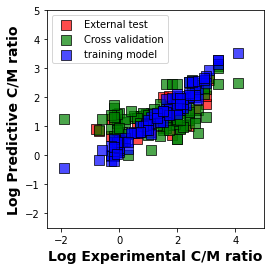

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


model_RF = RandomForestRegressor(n_estimators=200, random_state=42)

#calculate R2
model_RF_fit = model_RF.fit(train_x, train_y)
y_pred = model_RF.predict(train_x)
r2_train = r2_score(train_y, y_pred)
RMSE_train = mean_squared_error(train_y, y_pred)

#CV
y_cv = cross_val_predict(model_RF, train_x, train_y, cv=kf)

#Rsqure_CV
r2_cv = r2_score(train_y, y_cv)
RMSE_cv = mean_squared_error(train_y, y_cv)


#Test
y_ext = model_RF.predict(test_x)
#Rsqure_ext
r2_ext = r2_score(test_y, y_ext)
RMSE_test = mean_squared_error(test_y, y_ext)

print('Results')
print('===================================')
print(f'R2 model is {r2_train}')
print(f'RMSE model is {RMSE_train}')
print('===================================')
print(f'Q2 CV is {r2_cv}')
print(f'RMSE CV is {RMSE_cv}')
print('===================================')
print(f'Q2 test is {r2_ext}')
print(f'RMSE test is {RMSE_test}')
print('===================================')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(test_y, y_ext, c='red', marker='s', s = 100, alpha=0.7, edgecolors='black', label='External test')
plt.scatter(train_y, y_cv, c='green', marker='s', s = 100, alpha=0.7, edgecolors='black',label='Cross validation')
plt.scatter(train_y, y_pred, c='blue', marker='s', s = 100, alpha=0.7, edgecolors='black',label='training model')
plt.ylabel('Log Predictive C/M ratio', weight='bold', fontsize=14)
plt.xlabel('Log Experimental C/M ratio', weight='bold', fontsize=14)
plt.xlim(-2.5,5)
plt.ylim(-2.5,5)
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

# QSAR result export RF_model

In [74]:
pd.DataFrame(train_x, indices_train).to_csv("Result_RF/1493_features/x_train_kp.csv")
pd.DataFrame(test_x, indices_test).to_csv("Result_RF/1493_features/x_test_kp.csv")
pd.DataFrame(y_cv, indices_train).to_csv("Result_RF/1493_features/y_cv_kp.csv")
pd.DataFrame(train_y, indices_train).to_csv("Result_RF/1493_features/train_y_kp.csv")
pd.DataFrame(test_y, indices_test).to_csv("Result_RF/1493_features/test_y_kp.csv")
pd.DataFrame(y_pred, indices_train).to_csv("Result_RF/1493_features/y_pred_kp.csv")
pd.DataFrame(y_ext, indices_test).to_csv("Result_RF/1493_features/y_SVR_ext_kp.csv")

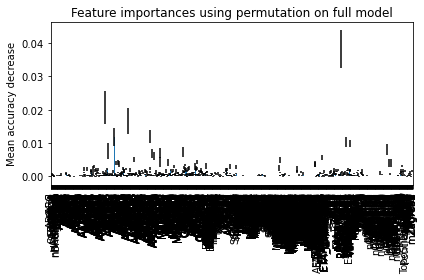

In [75]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, train_x, train_y, n_repeats=10, random_state=42, n_jobs=2)
feature_names = train_x.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [76]:
forest_importances_sd = pd.Series(result.importances_std, index=feature_names, name='SD')
forest_importances = pd.Series(result.importances_mean, index=feature_names, name='Mean')
FI_RF_train_mean = pd.DataFrame(forest_importances)
FI_RF_train_sd = pd.DataFrame(forest_importances_sd)
FI_RF_train_all = pd.concat([FI_RF_train_mean, FI_RF_train_sd], axis=1)
FI_RF_train_all.to_csv('Result_RF/forest_importances_train_RF_Kp_1493.csv')
FI_RF_train_all

,Mean,SD
ABC,2.568797e-05,0.000008
ABCGG,-2.084859e-05,0.000017
nAcid,0.000000e+00,0.000000
nBase,-2.717741e-06,0.000007
SpAbs_A,3.354543e-05,0.000028
...,...,...
WPol,6.785693e-06,0.000010
Zagreb1,4.582226e-05,0.000015
Zagreb2,2.638936e-05,0.000020
mZagreb1,1.597058e-03,0.000402


In [77]:
FI = FI_RF_train_all.sort_values(by=['Mean'])
FI_10 = FI.tail(10)
FI_10

,Mean,SD
GATS3c,0.007447,0.001516
ATSC4c,0.007694,0.002412
nFaRing,0.008137,0.001671
VSA_EState4,0.009835,0.001103
SlogP_VSA10,0.010353,0.001460
ATSC3s,0.011866,0.002771
AATSC4se,0.011950,0.001889
ATSC4are,0.016658,0.004001
AATS8p,0.020760,0.004953
PEOE_VSA10,0.038233,0.005785


In [78]:
features_10 = fingerprint_to_model[['PEOE_VSA10', 'AATS8p', "ATSC4are", 'AATSC4se', 'ATSC3s', 'SlogP_VSA10', 
                                    'VSA_EState4', 'nFaRing', 'ATSC4c', 'GATS3c']]

In [79]:
features_10

,PEOE_VSA10,AATS8p,ATSC4are,AATSC4se,ATSC3s,SlogP_VSA10,VSA_EState4,nFaRing,ATSC4c,GATS3c
Name,,,,,,,,,,
Astemizole,0.248643,0.694674,0.503692,0.527640,0.213938,0.339038,0.322814,1.0,0.552370,0.760553
Atorvastatin,0.125049,0.731495,0.992193,0.869576,0.000000,0.330481,0.345147,0.0,0.968596,0.619942
Caffeine,0.000000,0.000000,0.429244,0.198853,0.217752,0.000000,0.013022,1.0,0.545141,0.824000
Candesartan,0.000000,0.724338,0.514692,0.477649,0.210994,0.000000,0.377414,1.0,0.588630,0.526815
Cerivastatin,0.125049,0.549795,0.860893,0.824839,0.035560,0.143975,0.365122,0.0,0.838830,0.425489
...,...,...,...,...,...,...,...,...,...,...
Simvastatin acid,0.262427,0.667538,0.608855,0.605880,0.146025,0.000000,0.056735,0.0,0.726086,0.798024
Verapamil,0.000000,0.670759,0.590836,0.578044,0.276591,0.000000,0.116024,0.0,0.502216,0.172714
sesamol,0.123594,0.000000,0.660253,0.694701,0.182425,0.000000,0.000000,0.0,0.613312,0.421972


In [80]:
df = features_10.tail(3)
df

,PEOE_VSA10,AATS8p,ATSC4are,AATSC4se,ATSC3s,SlogP_VSA10,VSA_EState4,nFaRing,ATSC4c,GATS3c
Name,,,,,,,,,,
sesamol,0.123594,0.000000,0.660253,0.694701,0.182425,0.0,0.000000,0.0,0.613312,0.421972
sesamin,0.000000,0.742208,0.474248,0.413485,0.229317,0.0,0.162242,0.0,0.420476,0.135377
sesamolin,0.123594,0.699983,0.513092,0.485657,0.205154,0.0,0.078268,0.0,0.568019,0.384167


In [81]:
df.to_csv('Result_RF/Features_10_SM.csv') 

In [82]:
train_x, test_x, train_y, test_y, indices_train, indices_test = train_test_split(features_10, label_to_model, indices, test_size=0.2, random_state=42)
splits = [train_x, test_x, train_y, test_y]
# NBVAL_CHECK_OUTPUT
print("Training data size:", len(train_x))
print("Test data size:", len(test_x))

Training data size: 115
Test data size: 29


In [83]:
train_x.shape

(115, 10)

## RF 10 features

Results
0.38 accuracy with a standard deviation of 0.16
R2 model is 0.9185958871788249
RMSE model is 0.10133725632178606
Q2 CV is 0.45653564759918763
RMSE CV is 0.6765405883358366
Q2 test is 0.36800035591177804
RMSE test is 0.729016474114131


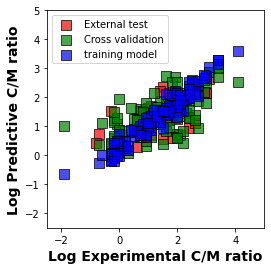

In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


model_RF = RandomForestRegressor(n_estimators=200, random_state=42)
scores=cross_val_score(model_RF, train_x, train_y, cv=kf)


#calculate R2
model_RF_fit = model_RF.fit(train_x, train_y)
y_pred = model_RF.predict(train_x)
r2_train = r2_score(train_y, y_pred)
RMSE_train = mean_squared_error(train_y, y_pred)


#CV
y_cv = cross_val_predict(model_RF, train_x, train_y, cv=kf)

#Rsqure_CV
r2_cv = r2_score(train_y, y_cv)
RMSE_cv = mean_squared_error(train_y, y_cv)


#Test
y_ext = model_RF.predict(test_x)
#Rsqure_ext
r2_ext = r2_score(test_y, y_ext)
RMSE_test = mean_squared_error(test_y, y_ext)

print('Results')
print('===================================')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('===================================')
print(f'R2 model is {r2_train}')
print(f'RMSE model is {RMSE_train}')
print('===================================')
print(f'Q2 CV is {r2_cv}')
print(f'RMSE CV is {RMSE_cv}')
print('===================================')
print(f'Q2 test is {r2_ext}')
print(f'RMSE test is {RMSE_test}')
print('===================================')


fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(test_y, y_ext, c='red', marker='s', s = 100, alpha=0.7, edgecolors='black', label='External test')
plt.scatter(train_y, y_cv, c='green', marker='s', s = 100, alpha=0.7, edgecolors='black',label='Cross validation')
plt.scatter(train_y, y_pred, c='blue', marker='s', s = 100, alpha=0.7, edgecolors='black',label='training model')
plt.ylabel('Log Predictive C/M ratio', weight='bold', fontsize=14)
plt.xlabel('Log Experimental C/M ratio', weight='bold', fontsize=14)
plt.xlim(-2.5,5)
plt.ylim(-2.5,5)
ax.set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [85]:
pd.DataFrame(train_x, indices_train).to_csv("Result_RF/10_features/x_train_kp.csv")
pd.DataFrame(test_x, indices_test).to_csv("Result_RF/10_features/x_test_kp.csv")
pd.DataFrame(y_cv, indices_train).to_csv("Result_RF/10_features/y_cv_kp.csv")
pd.DataFrame(train_y, indices_train).to_csv("Result_RF/10_features/train_y_kp.csv")
pd.DataFrame(test_y, indices_test).to_csv("Result_RF/10_features/test_y_kp.csv")
pd.DataFrame(y_pred, indices_train).to_csv("Result_RF/10_features/y_pred_kp.csv")
pd.DataFrame(y_ext, indices_test).to_csv("Result_RF/10_features/y_ext_kp.csv")

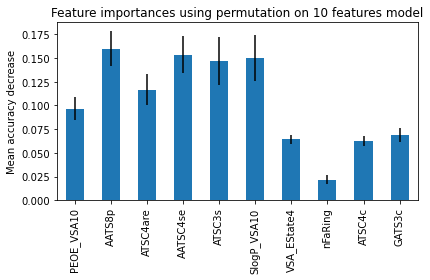

,Mean,SD
PEOE_VSA10,0.096668,0.011969
AATS8p,0.159914,0.018639
ATSC4are,0.116422,0.016425
AATSC4se,0.153667,0.019479
ATSC3s,0.146544,0.025238
SlogP_VSA10,0.149940,0.023899
VSA_EState4,0.064190,0.005015
nFaRing,0.021800,0.004744
ATSC4c,0.062291,0.005155
GATS3c,0.069023,0.007064


In [86]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, train_x, train_y, n_repeats=10, random_state=42, n_jobs=-1)
feature_names = train_x.columns
forest_importances_sd = pd.Series(result.importances_std, index=feature_names, name='SD')
forest_importances = pd.Series(result.importances_mean, index=feature_names, name='Mean')
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on 10 features model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
FI_RF_train_mean = pd.DataFrame(forest_importances)
FI_RF_train_sd = pd.DataFrame(forest_importances_sd)
FI_RF_train_all = pd.concat([FI_RF_train_mean, FI_RF_train_sd], axis=1)
FI_RF_train_all.to_csv('Result_RF/10_features/forest_importances_train_RF_Kp_10.csv')
FI_RF_train_all

In [87]:
FI = FI_RF_train_all.sort_values(by=['Mean'])
FI_10 = FI.tail(10)
FI_10

,Mean,SD
nFaRing,0.021800,0.004744
ATSC4c,0.062291,0.005155
VSA_EState4,0.064190,0.005015
GATS3c,0.069023,0.007064
PEOE_VSA10,0.096668,0.011969
ATSC4are,0.116422,0.016425
ATSC3s,0.146544,0.025238
SlogP_VSA10,0.149940,0.023899
AATSC4se,0.153667,0.019479
AATS8p,0.159914,0.018639


Text(0.5, 0, 'Permutation Feature Importances')

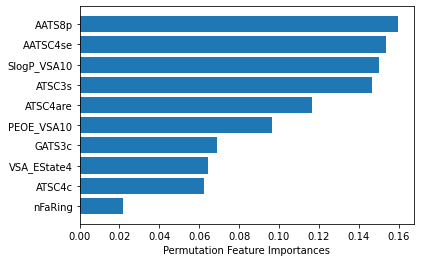

In [88]:
sorted_idx = result.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importances")

In [89]:
feature_names = train_x.columns
model_RF.feature_importances_

array([0.11770248, 0.16609771, 0.12239436, 0.12265712, 0.1084582 ,
       0.09829413, 0.08338146, 0.03693373, 0.08278438, 0.06129642])

Text(0.5, 0, 'Random Forest Feature Iqmportance')

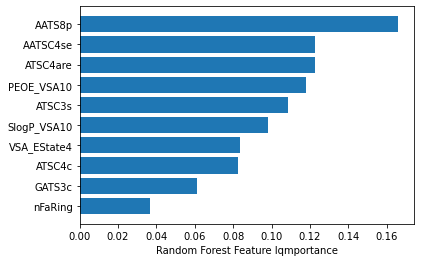

In [90]:
sorted_idx = model_RF.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], model_RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Iqmportance")

In [91]:
import shap
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(train_x)

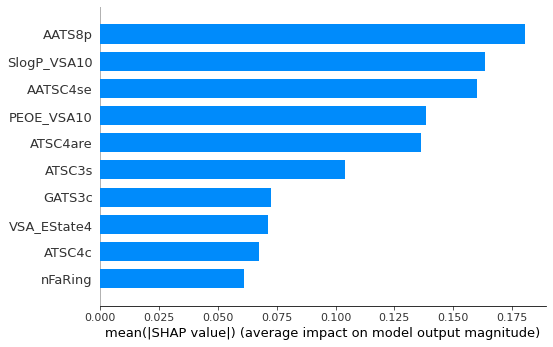

In [92]:
shap.summary_plot(shap_values, train_x, plot_type="bar")

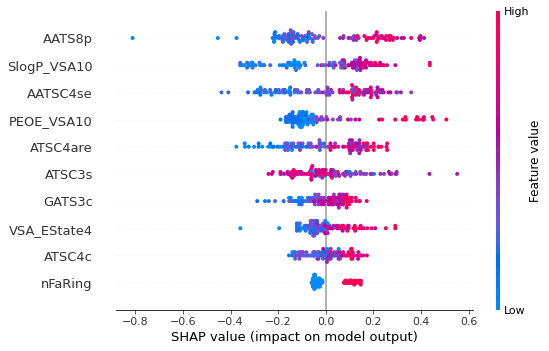

In [93]:
shap.summary_plot(shap_values, train_x)

In [94]:
from rdkit import Chem


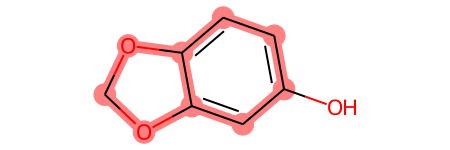

In [96]:
SM = Chem.MolFromSmiles('Oc1ccc2c(c1)OCO2')
substructure = Chem.MolFromSmarts('c1ccc2c(c1)OCO2')
SM.GetSubstructMatches(substructure)
SM

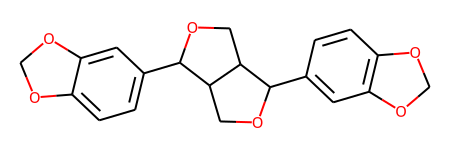

In [97]:
Chem.MolFromSmiles('C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2')

In [100]:
SMin = Chem.MolFromSmiles('C1Oc2c(O1)cc(cc2)C1OCC2C1COC2c1ccc2c(c1)OCO2')
substructure = Chem.MolFromSmarts('c1ccc2c(c1)OCO2')
print(SMin.GetSubstructMatches(substructure))

((6, 7, 8, 2, 3, 5, 4, 0, 1), (17, 18, 19, 20, 21, 22, 23, 24, 25))


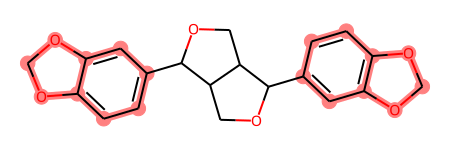

In [101]:
SMin

In [102]:
SMO = Chem.MolFromSmiles('C1Oc2c(O1)cc(cc2)OC1OCC2C1COC2c1ccc2c(c1)OCO2')
substructure = Chem.MolFromSmarts('c1ccc2c(c1)OCO2')
print(SMO.GetSubstructMatches(substructure))

((6, 7, 8, 2, 3, 5, 4, 0, 1), (18, 19, 20, 21, 22, 23, 24, 25, 26))


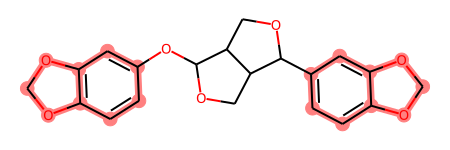

In [103]:
SMO

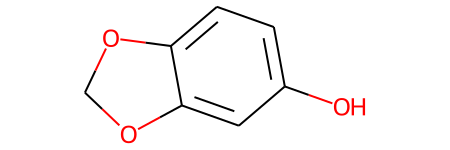

In [104]:
Chem.MolFromSmiles('Oc1ccc2c(c1)OCO2')